In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
cv2.__version__

'4.1.2'

In [4]:
pip install opencv-contrib-python --upgrade

     |████████████████████████████████| 66.7 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


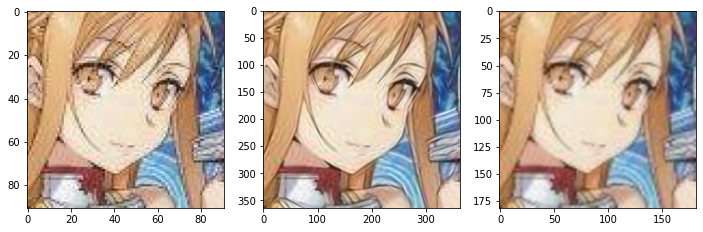

In [9]:
#EDSR
from itertools import count
import cv2
import matplotlib.pyplot as plt
import os
count = 0
def EDSR(img_path, dest_path, model_path="/content/drive/MyDrive/Colab Notebooks/EDSR_x4.pb"):
  global count
  try:
    img = cv2.imread(img_path)
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(model_path)
    sr.setModel("edsr",4)
    result = sr.upsample(img)
    #result = cv2.pyrUp(img)
    #cv2.imwrite(dest_path + str(count) + ".jpg", result)
    count += 1
  except:
    print(":(")
  plt.figure(figsize=(12,8))
  plt.subplot(1,3,1)
  # Original image
  plt.imshow(img[:,:,::-1])
  plt.subplot(1,3,2)
  # SR upscaled
  plt.imshow(result[:,:,::-1])
  plt.subplot(1,3,3)
  # OpenCV upscaled
  plt.imshow(cv2.pyrUp(img)[:,:,::-1])
  plt.show()
  
EDSR("/content/drive/MyDrive/Colab Notebooks/laomoface/train_18_face0.jpg", "")

In [ ]:
# count = 0
# for images in os.listdir("/content/drive/MyDrive/Colab Notebooks/railgunface"):
#     if (images.endswith(".jpg")):
#         EDSR("/content/drive/MyDrive/Colab Notebooks/railgunface/" + images, "/content/drive/MyDrive/Colab Notebooks/railgunface_upscaled/")
count = 0
for images in os.listdir("/content/drive/MyDrive/Colab Notebooks/laomoface"):
    if (images.endswith(".jpg")):
        EDSR("/content/drive/MyDrive/Colab Notebooks/laomoface/" + images, "/content/drive/MyDrive/Colab Notebooks/laomo_upscaled_edsr")

In [ ]:
# count the number of images in a file
import os
count = 0
for images in os.listdir("/content/drive/MyDrive/Colab Notebooks/railgunface_upscale"):
    if (images.endswith(".jpg")):
        count += 1
count

